In [108]:
import pandas as pd 

In [109]:
data_type={'Open':float,
           'High':float,
           'low':float,
           'Change %':float
}
df= pd.read_csv("../dataset/Ethereum Historical Data.csv",dtype=data_type,thousands=',')

df

,Date,Price,Open,High,Low,Vol,Change %
0,"May 06, 2023",1969.82,1993.33,2013.10,1964.43,641.57K,-1.18
1,"May 05, 2023",1993.33,1877.06,1996.64,1875.66,589.05K,6.19
2,"May 04, 2023",1877.06,1904.76,1915.15,1868.18,372.69K,-1.45
3,"May 03, 2023",1904.74,1869.74,1915.00,1844.72,489.66K,1.87
4,"May 02, 2023",1869.74,1830.75,1878.70,1823.25,391.27K,2.13
...,...,...,...,...,...,...,...
2609,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-17.05
2610,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64
2611,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12
2612,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70


In [110]:
pd.set_option('display.max_rows',2000)
df['Vol']

0       641.57K
1       589.05K
2       372.69K
3       489.66K
4       391.27K
         ...   
2609     92.18K
2610      1.30K
2611      0.83K
2612      0.18K
2613      0.00K
Name: Vol, Length: 2614, dtype: object

In [111]:
df['Vol'] = df['Vol'].str.replace('K','000')
df['Vol'] = df['Vol'].str.replace('M','000000')
df['Vol'] = df['Vol'].str.replace('B','000000000')
df['Vol'] = df['Vol'].replace('-', float('nan'))
df['Vol'] = df['Vol'].astype(float)
mean_value = df['Vol'].mean()
df['Vol'] = df['Vol'].fillna(mean_value)
# df['Vol'].isna().sum()
print(df)

              Date    Price     Open     High      Low     Vol  Change %
0     May 06, 2023  1969.82  1993.33  2013.10  1964.43  641.57     -1.18
1     May 05, 2023  1993.33  1877.06  1996.64  1875.66  589.05      6.19
2     May 04, 2023  1877.06  1904.76  1915.15  1868.18  372.69     -1.45
3     May 03, 2023  1904.74  1869.74  1915.00  1844.72  489.66      1.87
4     May 02, 2023  1869.74  1830.75  1878.70  1823.25  391.27      2.13
...            ...      ...      ...      ...      ...     ...       ...
2609  Mar 14, 2016    12.50    15.07    15.07    11.40   92.18    -17.05
2610  Mar 13, 2016    15.07    12.92    15.07    12.92    1.30     16.64
2611  Mar 12, 2016    12.92    11.95    13.45    11.95    0.83      8.12
2612  Mar 11, 2016    11.95    11.75    11.95    11.75    0.18      1.70
2613  Mar 10, 2016    11.75    11.20    11.85    11.07    0.00      4.91

[2614 rows x 7 columns]


In [112]:
df['Vol'].isna().sum()
print(df)

              Date    Price     Open     High      Low     Vol  Change %
0     May 06, 2023  1969.82  1993.33  2013.10  1964.43  641.57     -1.18
1     May 05, 2023  1993.33  1877.06  1996.64  1875.66  589.05      6.19
2     May 04, 2023  1877.06  1904.76  1915.15  1868.18  372.69     -1.45
3     May 03, 2023  1904.74  1869.74  1915.00  1844.72  489.66      1.87
4     May 02, 2023  1869.74  1830.75  1878.70  1823.25  391.27      2.13
...            ...      ...      ...      ...      ...     ...       ...
2609  Mar 14, 2016    12.50    15.07    15.07    11.40   92.18    -17.05
2610  Mar 13, 2016    15.07    12.92    15.07    12.92    1.30     16.64
2611  Mar 12, 2016    12.92    11.95    13.45    11.95    0.83      8.12
2612  Mar 11, 2016    11.95    11.75    11.95    11.75    0.18      1.70
2613  Mar 10, 2016    11.75    11.20    11.85    11.07    0.00      4.91

[2614 rows x 7 columns]


In [103]:
X=df.drop(columns=['Date','Change %'],axis=1)
Y = df['Change %']

In [104]:
unique_values = X['High'].unique()
print(unique_values)


[2013.1  1996.64 1915.15 ...   15.07   13.45   11.95]


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

clf=LinearRegression()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy = mean_squared_error(Y_test,Y_pred).round(2)
print("Accuracy:", accuracy,"%")

Accuracy: 21.39 %


In [107]:
import matplotlib.pyplot as plt

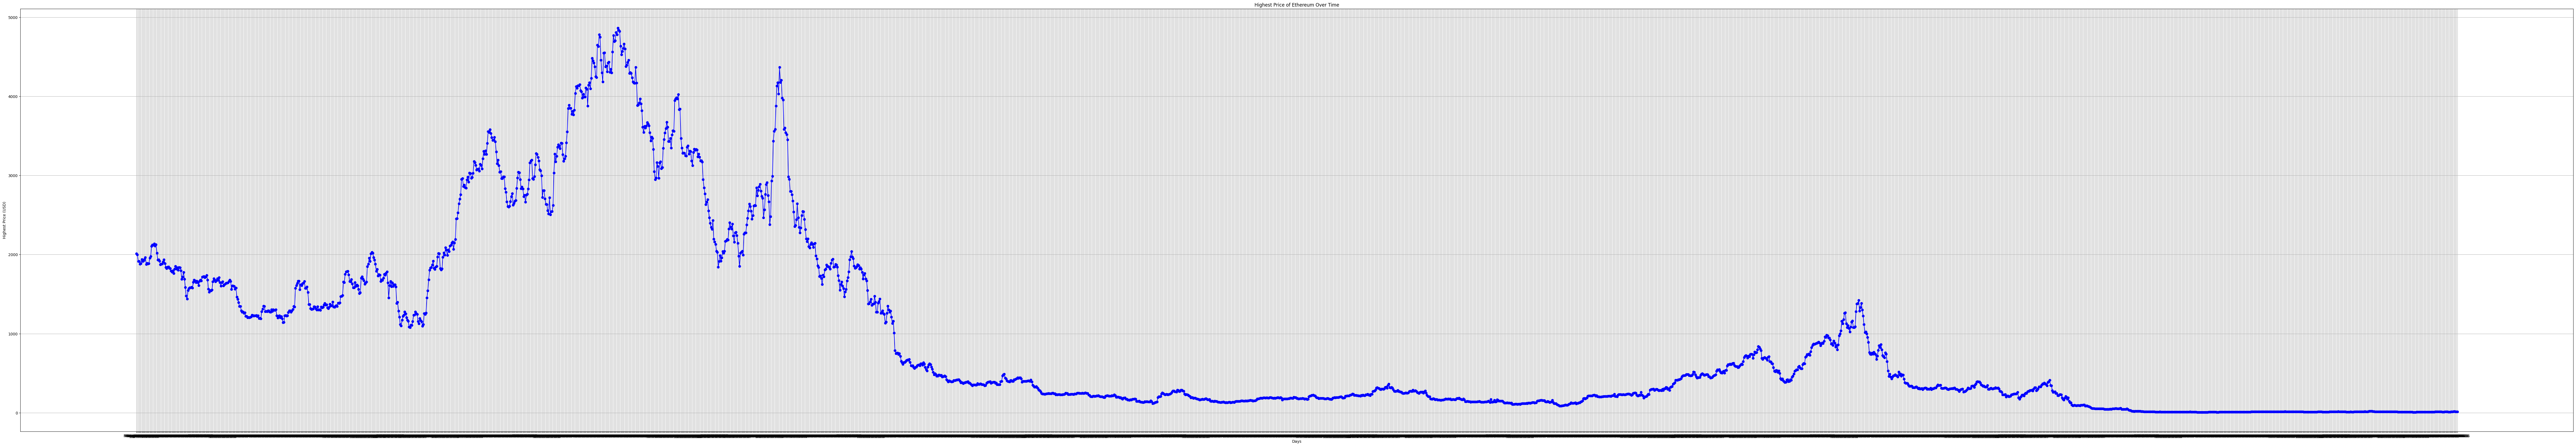

In [12]:
plt.figure(figsize=(120,20))
plt.plot(df['Date'],df['High'],color='blue',marker='o',linestyle='-')
plt.title('Highest Price of Ethereum Over Time')
plt.xlabel('Days')
plt.ylabel('Highest Price (USD)')
plt.grid(True)
plt.show()